<a href="https://colab.research.google.com/github/wannasmile/colab_code_note/blob/main/IRC022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx

--2025-08-29 01:43:50--  https://raw.githubusercontent.com/wannasmile/colab_code_note/main/data_for_tree.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8881601 (8.5M) [application/octet-stream]
Saving to: ‘data_for_tree.xlsx.1’

data_for_tree.xlsx. 100%[===================>]   8.47M  20.4MB/s    in 0.4s    

2025-08-29 01:43:51 (20.4 MB/s) - ‘data_for_tree.xlsx.1’ saved [8881601/8881601]



In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
data = pd.read_excel('data_for_tree.xlsx', nrows=80000)
#data = pd.read_excel('data_for_tree.xlsx')
data.head()

,uid,oil_actv_dt,create_dt,total_oil_cnt,pay_amount_total,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-19,2018-08-17,275.0,48295495.4,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-19,2018-08-16,275.0,48295495.4,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-19,2018-08-15,275.0,48295495.4,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-19,2018-08-14,275.0,48295495.4,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-19,2018-08-13,275.0,48295495.4,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3


In [4]:
org_lst = ['uid','create_dt','oil_actv_dt','class_new','bad_ind']
agg_lst = ['oil_amount','discount_amount','sale_amount','amount','pay_amount','coupon_amount','payment_coupon_amount']
dstc_lst = ['channel_code','oil_code','scene','source_app','call_source']

df = data[org_lst].copy()
df[agg_lst] = data[agg_lst].copy()
df[dstc_lst] = data[dstc_lst].copy()

base = df[org_lst].copy()
base = base.drop_duplicates(['uid'],keep='first')

In [5]:
df.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount,discount_amount,sale_amount,amount,pay_amount,coupon_amount,payment_coupon_amount,channel_code,oil_code,scene,source_app,call_source
0,A8217710,2018-08-17,2018-08-19,B,0,3308.56,1760081.0,1796001.0,1731081.0,8655401.0,1.0,1.0,1,3,2,0,3
1,A8217710,2018-08-16,2018-08-19,B,0,4674.68,2487045.0,2537801.0,2437845.0,12189221.0,1.0,1.0,1,3,2,0,3
2,A8217710,2018-08-15,2018-08-19,B,0,1873.06,977845.0,997801.0,961845.0,4809221.0,1.0,1.0,1,2,2,0,3
3,A8217710,2018-08-14,2018-08-19,B,0,4837.78,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,2,2,0,3
4,A8217710,2018-08-13,2018-08-19,B,0,2586.38,1350441.0,1378001.0,1328441.0,6642201.0,1.0,1.0,1,2,2,0,3
5,A8217710,2018-08-12,2018-08-19,B,0,2135.72,1115045.0,1137801.0,1097045.0,5485221.0,1.0,1.0,1,2,2,0,3
6,A8217710,2018-08-11,2018-08-19,B,0,1894.18,979609.0,999601.0,963609.0,4818041.0,1.0,1.0,1,2,2,0,3
7,A8217710,2018-08-09,2018-08-19,B,0,4795.80,2528009.0,2579601.0,2486009.0,12430041.0,1.0,1.0,1,3,2,0,3
8,A8217710,2018-08-07,2018-08-19,B,0,4883.58,2526441.0,2578001.0,2484441.0,12422201.0,1.0,1.0,1,3,2,0,3
9,A8217710,2018-08-06,2018-08-19,B,0,3475.14,1763609.0,1799601.0,1734609.0,8673041.0,1.0,1.0,1,2,2,0,3


In [6]:

gn = pd.DataFrame()
for i in agg_lst:
    #计算个数
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:len(df[i])).reset_index())
    tp.columns = ['uid',i + '_cnt']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #求历史特征值大于零的个数
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.where(df[i]>0,1,0).sum()).reset_index())
    tp.columns = ['uid',i + '_num']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求和
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nansum(df[i])).reset_index())
    tp.columns = ['uid',i + '_tot']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求均值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmean(df[i])).reset_index())
    tp.columns = ['uid',i + '_avg']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求最大值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmax(df[i])).reset_index())
    tp.columns = ['uid',i + '_max']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求最小值
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_min']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求方差
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanvar(df[i])).reset_index())
    tp.columns = ['uid',i + '_var']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求极差
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmax(df[i])-np.nanmin(df[i])).reset_index())
    tp.columns = ['uid',i + '_ran']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')
    #对历史数据求变异系数（为防止除数为0，利用0.01进行平滑）
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df:np.nanmean(df[i])/(np.nanvar(df[i])+0.01))).reset_index()
    tp.columns = ['uid',i + '_cva']
    if gn.empty == True:
        gn = tp
    else:
        gn = pd.merge(gn,tp,on = 'uid',how = 'left')


gn.head(10)

/tmp/ipython-input-1976888938.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(
/tmp/ipython-input-1976888938.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(
/tmp/ipython-input-1976888938.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future 

,uid,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,oil_amount_min,oil_amount_var,oil_amount_ran,oil_amount_cva,...,coupon_amount_cva,payment_coupon_amount_cnt,payment_coupon_amount_num,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_ran,payment_coupon_amount_cva
0,A10000481,1,1,190.52,190.520000,190.52,190.52,0.000000,0.00,19052.000000,...,0.0,1,1,200.0,200.000000,200.0,200.0,0.000000,0.0,20000.000000
1,A1000232,3,3,748.64,249.546667,277.92,220.10,557.768089,57.82,0.447394,...,0.0,3,2,300.0,100.000000,200.0,0.0,6666.666667,200.0,0.015000
2,A1000455,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,A10006069,7,7,1108.46,158.351429,239.78,117.34,1431.817927,122.44,0.110594,...,0.0,7,7,1300.0,185.714286,300.0,100.0,6938.775510,200.0,0.026765
4,A10010042,15,15,1499.10,99.940000,153.94,64.24,437.167200,89.70,0.228603,...,0.0,15,12,1900.0,126.666667,500.0,0.0,13955.555556,500.0,0.009076
5,A1001014,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6,A1001592,22,22,10495.58,477.071818,667.68,271.94,12350.315042,395.74,0.038628,...,100.0,22,22,22.0,1.000000,1.0,1.0,0.000000,0.0,100.000000
7,A10015929,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
8,A10017144,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
9,A10017912,1,0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gc = pd.DataFrame()

"""
离散值处理
"""
for i in dstc_lst:
    tp = pd.DataFrame(df.groupby('uid').apply(
                      lambda df: len(set(df[i]))).reset_index())
    tp.columns = ['uid',i + '_dstc']
    if gc.empty == True:
        gc = tp
    else:
        gc = pd.merge(gc,tp,on = 'uid',how = 'left')

fn = base.merge(gn,on='uid').merge(gc,on='uid')
fn = pd.merge(fn,gc,on='uid')
fn.shape

/tmp/ipython-input-3395292478.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(
/tmp/ipython-input-3395292478.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tp = pd.DataFrame(df.groupby('uid').apply(
/tmp/ipython-input-3395292478.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future ve

(11307, 78)

In [8]:
pd.set_option('display.max_columns', None)

fn.head(10)

,uid,create_dt,oil_actv_dt,class_new,bad_ind,oil_amount_cnt,oil_amount_num,oil_amount_tot,oil_amount_avg,oil_amount_max,oil_amount_min,oil_amount_var,oil_amount_ran,oil_amount_cva,discount_amount_cnt,discount_amount_num,discount_amount_tot,discount_amount_avg,discount_amount_max,discount_amount_min,discount_amount_var,discount_amount_ran,discount_amount_cva,sale_amount_cnt,sale_amount_num,sale_amount_tot,sale_amount_avg,sale_amount_max,sale_amount_min,sale_amount_var,sale_amount_ran,sale_amount_cva,amount_cnt,amount_num,amount_tot,amount_avg,amount_max,amount_min,amount_var,amount_ran,amount_cva,pay_amount_cnt,pay_amount_num,pay_amount_tot,pay_amount_avg,pay_amount_max,pay_amount_min,pay_amount_var,pay_amount_ran,pay_amount_cva,coupon_amount_cnt,coupon_amount_num,coupon_amount_tot,coupon_amount_avg,coupon_amount_max,coupon_amount_min,coupon_amount_var,coupon_amount_ran,coupon_amount_cva,payment_coupon_amount_cnt,payment_coupon_amount_num,payment_coupon_amount_tot,payment_coupon_amount_avg,payment_coupon_amount_max,payment_coupon_amount_min,payment_coupon_amount_var,payment_coupon_amount_ran,payment_coupon_amount_cva,channel_code_dstc_x,oil_code_dstc_x,scene_dstc_x,source_app_dstc_x,call_source_dstc_x,channel_code_dstc_y,oil_code_dstc_y,scene_dstc_y,source_app_dstc_y,call_source_dstc_y
0,A8217710,2018-08-17,2018-08-19,B,0,137,137,492617.96,3595.751533,7952.82,78.22,4.371033e+06,7874.60,0.000823,137,137,245751209.0,1.793804e+06,3916081.0,39201.0,1.162706e+12,3876880.0,0.000002,137,137,250766537.0,1.830413e+06,3996001.0,40001.0,1.210648e+12,3956000.0,0.000002,137,137,241477609.0,1.762610e+06,3851081.0,39201.0,1.118763e+12,3811880.0,0.000002,137,137,1.207387e+09,8.813047e+06,19255401.0,196001.0,2.796907e+13,19059400.0,3.150998e-07,137,137,137.0,1.0,1.0,1.0,0.0,0.0,100.0,137,137,137.0,1.0,1.0,1.0,0.0,0.0,100.0,1,3,1,1,1,1,3,1,1,1
1,A7261706,2018-08-01,2018-08-03,B,0,243,243,145830.84,600.126914,1481.00,4.34,1.288894e+05,1476.66,0.004656,243,243,73441743.0,3.022294e+05,725201.0,1801.0,3.136779e+10,723400.0,0.000010,243,243,79235243.0,3.260710e+05,740001.0,2001.0,3.437130e+10,738000.0,0.000009,243,243,72848743.0,2.997891e+05,713201.0,1801.0,3.054187e+10,711400.0,0.000010,243,243,3.642427e+08,1.498941e+06,3566001.0,9001.0,7.635467e+11,3557000.0,1.963130e-06,243,243,243.0,1.0,1.0,1.0,0.0,0.0,100.0,243,243,243.0,1.0,1.0,1.0,0.0,0.0,100.0,1,2,3,1,1,1,2,3,1,1
2,A10920578,2018-08-31,2018-09-05,E,0,59,59,100928.26,1710.648475,6127.14,110.10,2.058333e+06,6017.04,0.000831,59,59,53030003.0,8.988136e+05,3366001.0,59401.0,6.094434e+11,3306600.0,0.000001,59,59,53565659.0,9.078925e+05,3400001.0,60001.0,6.218176e+11,3340000.0,0.000001,59,59,52429803.0,8.886407e+05,3333001.0,59401.0,5.969902e+11,3273600.0,0.000001,59,59,2.621488e+08,4.443200e+06,16665001.0,297001.0,1.492475e+13,16368000.0,2.977067e-07,59,59,59.0,1.0,1.0,1.0,0.0,0.0,100.0,59,59,59.0,1.0,1.0,1.0,0.0,0.0,100.0,1,1,1,1,1,1,1,1,1,1
3,A1389291,2018-07-28,2018-08-01,C,0,48,48,67548.92,1407.269167,3119.02,474.30,1.698624e+05,2644.72,0.008285,48,48,34639096.0,7.216478e+05,1647003.0,250003.0,4.305904e+10,1397000.0,0.000017,48,48,35346016.0,7.363753e+05,1680615.0,255105.0,4.483448e+10,1425510.0,0.000016,48,48,34077896.0,7.099562e+05,1620003.0,246003.0,4.168049e+10,1374000.0,0.000017,48,48,1.703893e+08,3.549777e+06,8100011.0,1230011.0,1.042012e+12,6870000.0,3.406655e-06,48,48,48.0,1.0,1.0,1.0,0.0,0.0,100.0,48,48,48.0,1.0,1.0,1.0,0.0,0.0,100.0,1,1,1,1,2,1,1,1,1,2
4,A4260408,2018-09-02,2018-09-29,B,0,69,69,65624.72,951.082899,1963.42,187.22,1.441932e+05,1776.20,0.006596,69,69,32813285.0,4.755549e+05,936241.0,98001.0,3.594813e+10,838240.0,0.000013,69,69,32946669.0,4.774880e+05,940001.0,100001.0,3.621982e+10,840000.0,0.000013,69,69,32381685.0,4.692998e+05,921241.0,97001.0,3.502605e+10,824240.0,0.000013,69,69,1.619081e+08,2.346495e+06,4606201.0,485001.0,8.756512e+11,4121200.0,2.679714e-06,69,69,69.0,1.0,1.0,1.0,0.0,0.0,100.0,69,69,69.0,1.0,1.0,1.0,0.0,0.0,100.0,1,1,2,1,1,1,1,2,1,1
5,A5249423,2018-10

In [9]:
X = fn.drop(['uid','oil_actv_dt','create_dt','bad_ind','class_new'],axis = 1)
y = fn.bad_ind.copy()

In [10]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 假设 X_train, y_train 已经准备好
# from sklearn.model_selection import train_test_split
# 假设 X, y 是你的特征和标签数据
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
import pandas as pd
import numpy as np

def calculate_psi(expected, actual, buckets=10):
    """
    计算两个系列之间的PSI值，处理各种边缘情况。
    """
    # 移除NaN值
    expected = expected.dropna()
    actual = actual.dropna()

    # 如果任一序列为空，返回NaN
    if len(expected) == 0 or len(actual) == 0:
        return np.nan

    # 检查特征是否是常数
    if expected.nunique() == 1 and actual.nunique() == 1:
        if expected.iloc[0] == actual.iloc[0]:
            return 0.0  # 分布完全相同
        else:
            return np.inf  # 分布完全不同

    # 尝试分位数分箱
    try:
        breakpoints = np.nanpercentile(expected, np.linspace(0, 100, buckets + 1))

        # 检查分箱边界是否唯一
        if len(np.unique(breakpoints)) < 2:
            # 如果分箱边界不唯一，使用替代方法
            return calculate_psi_alternative(expected, actual, buckets)

        expected_binned = pd.cut(expected, bins=breakpoints, include_lowest=True, duplicates='drop')
        actual_binned = pd.cut(actual, bins=breakpoints, include_lowest=True, duplicates='drop')

        # 计算每个箱子的样本占比
        expected_counts = expected_binned.value_counts().sort_index()
        actual_counts = actual_binned.value_counts().sort_index()

        # 确保两个分布有相同的箱子
        all_bins = set(expected_counts.index).union(set(actual_counts.index))
        for bin in all_bins:
            if bin not in expected_counts:
                expected_counts[bin] = 0
            if bin not in actual_counts:
                actual_counts[bin] = 0

        expected_counts = expected_counts.sort_index()
        actual_counts = actual_counts.sort_index()

        expected_percents = expected_counts / len(expected)
        actual_percents = actual_counts / len(actual)

        # 处理占比为0的箱子
        expected_percents = expected_percents.replace(0, 1e-6)
        actual_percents = actual_percents.replace(0, 1e-6)

        # 计算PSI
        psi_value = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))

        return psi_value

    except Exception as e:
        # 如果分位数分箱失败，使用替代方法
        print(f"Warning: {e}. Using alternative binning method.")
        return calculate_psi_alternative(expected, actual, buckets)

def calculate_psi_alternative(expected, actual, buckets=10):
    """
    当分位数分箱失败时使用的替代方法
    """
    # 检查是否是稀疏特征（大部分值为0）
    zero_ratio_expected = (expected == 0).mean()
    zero_ratio_actual = (actual == 0).mean()

    if zero_ratio_expected > 0.8 or zero_ratio_actual > 0.8:
        # 如果是稀疏特征，使用二分类方法
        return calculate_psi_for_sparse_feature(expected, actual)

    # 否则使用等宽分箱
    min_val = min(expected.min(), actual.min())
    max_val = max(expected.max(), actual.max())

    # 如果最小值和最大值相同，PSI为0
    if min_val == max_val:
        return 0.0

    breakpoints = np.linspace(min_val, max_val, buckets + 1)
    breakpoints = np.unique(breakpoints)  # 确保边界唯一

    if len(breakpoints) < 2:
        # 如果无法分箱，返回NaN
        return np.nan

    expected_binned = pd.cut(expected, bins=breakpoints, include_lowest=True)
    actual_binned = pd.cut(actual, bins=breakpoints, include_lowest=True)

    # 计算每个箱子的样本占比
    expected_counts = expected_binned.value_counts().sort_index()
    actual_counts = actual_binned.value_counts().sort_index()

    # 确保两个分布有相同的箱子
    all_bins = set(expected_counts.index).union(set(actual_counts.index))
    for bin in all_bins:
        if bin not in expected_counts:
            expected_counts[bin] = 0
        if bin not in actual_counts:
            actual_counts[bin] = 0

    expected_counts = expected_counts.sort_index()
    actual_counts = actual_counts.sort_index()

    expected_percents = expected_counts / len(expected)
    actual_percents = actual_counts / len(actual)

    # 处理占比为0的箱子
    expected_percents = expected_percents.replace(0, 1e-6)
    actual_percents = actual_percents.replace(0, 1e-6)

    # 计算PSI
    psi_value = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))

    return psi_value

def calculate_psi_for_sparse_feature(expected, actual):
    """
    专门处理稀疏特征（大部分值为0）的PSI计算
    """
    # 将特征转换为二分类：0 vs. 非0
    expected_binary = (expected != 0).astype(int)
    actual_binary = (actual != 0).astype(int)

    # 计算0和非0的占比
    expected_percents = expected_binary.value_counts(normalize=True).sort_index()
    actual_percents = actual_binary.value_counts(normalize=True).sort_index()

    # 确保两个分布有相同的类别
    for val in [0, 1]:
        if val not in expected_percents:
            expected_percents[val] = 1e-6
        if val not in actual_percents:
            actual_percents[val] = 1e-6

    expected_percents = expected_percents.sort_index()
    actual_percents = actual_percents.sort_index()

    # 计算PSI
    psi_value = np.sum((expected_percents - actual_percents) * np.log(expected_percents / actual_percents))

    return psi_value

def calculate_feature_psi(train_df, val_df, features=None, buckets=10):
    """
    计算DataFrame中所有指定特征在训练集和验证集之间的PSI。
    """
    if features is None:
        # 获取两个DataFrame共有的特征列
        features = train_df.columns.intersection(val_df.columns)

    psi_dict = {}
    for feature in features:
        # 提取当前特征的数据
        train_series = train_df[feature]
        val_series = val_df[feature]

        # 计算PSI
        psi_val = calculate_psi(train_series, val_series, buckets=buckets)
        psi_dict[feature] = psi_val

    # 将结果转换为Series并按PSI值降序排列
    psi_results = pd.Series(psi_dict).sort_values(ascending=False)
    return psi_results

In [12]:
pd.set_option('display.max_rows', None)
all_features_psi = calculate_feature_psi(X_train, X_test)
print("PSI for all features (sorted by value):")
print(all_features_psi)

# ****************** 如何使用 ******************
# 假设你有两个DataFrame：df_train 和 df_validation
# 包含相同的特征列


# 1. 计算所有特征的PSI
# all_features_psi = calculate_feature_psi(df_train, df_validation)
# print("PSI for all features (sorted by value):")
# print(all_features_psi)

# 2. 你也可以选择只计算部分特征
# selected_features = ['age', 'income', 'credit_score']
# selected_psi = calculate_feature_psi(df_train, df_validation, features=selected_features)

PSI for all features (sorted by value):
oil_amount_avg               0.015646
payment_coupon_amount_cva    0.008255
oil_amount_cva               0.008024
oil_amount_max               0.007823
amount_min                   0.007159
pay_amount_min               0.007159
payment_coupon_amount_avg    0.006939
discount_amount_min          0.006603
payment_coupon_amount_max    0.006499
sale_amount_ran              0.005907
amount_max                   0.005454
pay_amount_max               0.005454
sale_amount_var              0.005443
discount_amount_var          0.005316
oil_amount_min               0.005155
sale_amount_min              0.005095
discount_amount_ran          0.005065
payment_coupon_amount_var    0.005026
discount_amount_max          0.005011
pay_amount_ran               0.004091
amount_ran                   0.004091
payment_coupon_amount_min    0.003883
payment_coupon_amount_tot    0.003864
sale_amount_avg              0.003863
amount_var                   0.003819
pay_amount

### PSI 的核心概念

计算特征在训练集（Train）和验证集（Validation）之间的PSI（Population Stability Index，群体稳定性指数）是一个非常优秀且专业的做法。这可以在建模早期就识别出**分布不稳定**的特征，避免将那些在训练和验证阶段表现不一致的特征放入模型，从而提升模型的泛化能力和稳定性。


*   **目的**：衡量两个样本群体（通常是训练集 vs. 验证集/测试集）中，某个变量的分布是否存在显著差异。
*   **风控应用**：
    1.  **特征筛选**：剔除分布不稳定的特征，防止模型过拟合到训练集特有的分布上。
    2.  **模型监控**：上线后，比较近期样本（Actual）与训练样本（Expected）的PSI，监控模型输入特征是否发生漂移。

### 计算步骤

计算PSI的流程可以标准化为以下几步：

1.  **分箱（Binning）**：对训练集（Expected）的某个连续变量进行分箱（离散化），并计算每个箱子里样本的占比（%）。
2.  **应用分箱**：使用**训练集上得到的分箱边界**去切割验证集（Actual）的同一个变量，并计算验证集在每个箱子里的占比（%）。
    *   **关键**：一定要用训练集的分箱规则去切验证集，而不是各自独立分箱。
3.  **计算PSI**：根据两个分布的占比差，计算每个箱子的贡献，并求和得到总PSI。


计算出每个特征的PSI后，关键在于如何解读并采取行动。业界常用的经验法则是：

| PSI 值范围         | 解释                                                                 | 建议                                                                                               |
| ------------------- | -------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------- |
| **PSI < 0.1**       | **分布非常稳定** (Insignificant Change)                               | 特征分布几乎没有变化，是**优质、稳定**的特征，可以放心使用。                                           |
| **0.1 ≤ PSI < 0.25** | **分布有轻微变化** (Some Minor Change)                                | 特征分布有轻微偏移。需要**引起注意**，可以放入模型，但需要在上线后持续监控其稳定性。                         |
| **PSI ≥ 0.25**      | **分布发生显著变化** (Major Shift)                                    | **高度不稳定**！强烈建议**深入分析原因**并**谨慎使用或直接剔除**该特征。否则模型效果会极不稳定。             |

**注意事项：**

1.  **分箱策略**：对于连续型特征，使用分位数分箱；对于稀疏特征（大部分值为0），使用二分类方法；对于分类特征，直接按类别计算占比。
2.  **稀疏值处理**：如果某个箱子占比为0，直接计算log(0)会出错。代码中通过 `np.clip` 将其替换为一个极小的值（如 `1e-6`）来解决，这是标准做法。
3.  **业务判断**：PSI是一个统计指标，最终决策要结合业务知识。例如，一个PSI很高的特征，如果业务上认为它极其重要（如央行政策利率），那么可能需要寻找它漂移的原因，而不是简单删除。
4.  **验证集 vs. 测试集**：这个流程同样适用于**训练集 vs. 测试集**的比较，可以进一步验证模型泛化能力。
5.  **监控与记录**：记录哪些特征需要特殊处理，这有助于理解数据特性和模型稳定性。
6.  **阈值调整**：对于使用不同方法计算的PSI值，可能需要调整判断稳定性的阈值。



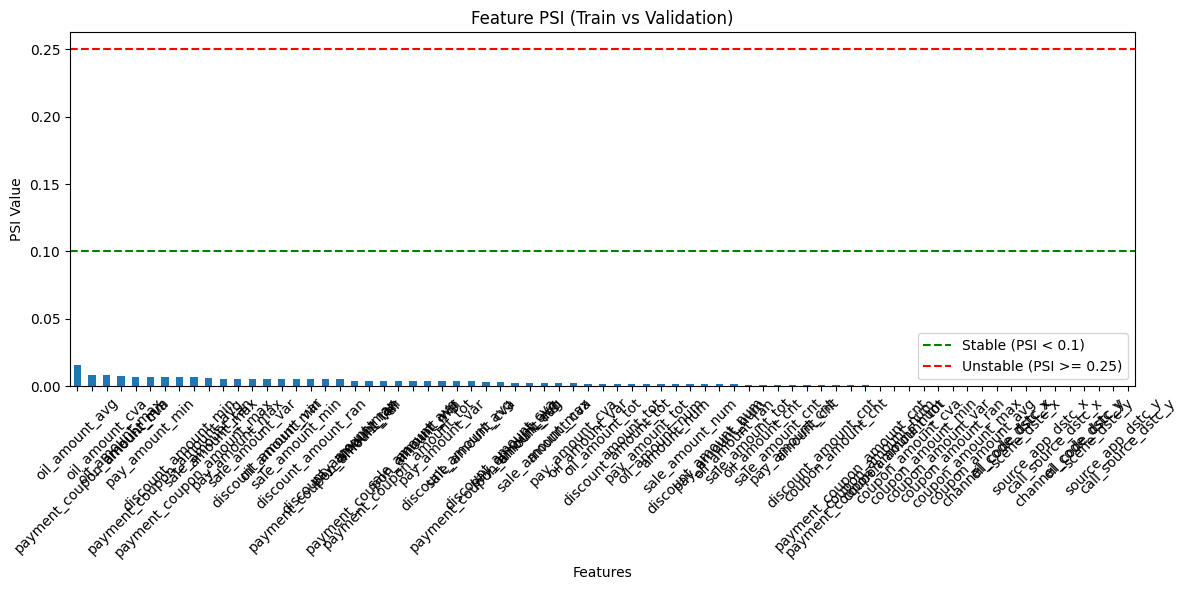

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
# 绘制PSI柱状图
all_features_psi.plot(kind='bar')
plt.axhline(y=0.1, color='green', linestyle='--', label='Stable (PSI < 0.1)')
plt.axhline(y=0.25, color='red', linestyle='--', label='Unstable (PSI >= 0.25)')
plt.title('Feature PSI (Train vs Validation)')
plt.ylabel('PSI Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 假设 X_train, y_train 已经准备好
# from sklearn.model_selection import train_test_split
# 假设 X, y 是你的特征和标签数据
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# --- Part 1: 优化超参数搜索 ---

# 初始化模型
model = DecisionTreeClassifier(random_state=42)

# 定义参数网格 (针对规则发现进行优化)
# 我们的目标是找到稳定且有业务意义的规则，而不是一个过拟合的复杂模型
param_grid = {
    # 深度不宜过深，否则规则会过于具体，泛化能力差。4-6层是很好的起点。
    'max_depth': [4, 5, 6],

    # 直接控制最终规则的数量，通常比max_depth更直观。
    # 我们希望找到10-25条核心规则进行分析。
    'max_leaf_nodes': [10, 15, 20, 25],

    # 【关键参数】叶节点最小样本数。这是防止过拟合、保证规则稳定性的最重要参数！
    # 这里的数值需要根据你的样本量来定。
    # 经验法则：设置为总样本量的 0.5% - 1%。
    # 例如，如果你的训练集有50000样本，那么可以设置为 [250, 500]。
    # 我这里先用绝对数值举例，请务必根据你的数据调整！
    'min_samples_leaf': [100, 200, 500],

    # 节点分裂的最小样本数，通常设置为 min_samples_leaf 的两倍以上。
    'min_samples_split': [200, 400, 1000]
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2 # 显示更详细的日志
)

# 在训练集上拟合网格搜索
print("Starting GridSearchCV for rule discovery...")
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳分数
print("\nBest parameters found: ", grid_search.best_params_)
print("Best CV score (AUC): ", grid_search.best_score_)

# 得到经过优化的、用于规则发现的最佳决策树模型
best_tree = grid_search.best_estimator_

Starting GridSearchCV for rule discovery...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found:  {'max_depth': 6, 'max_leaf_nodes': 10, 'min_samples_leaf': 200, 'min_samples_split': 1000}
Best CV score (AUC):  0.658361260304396


In [15]:
# --- Part 2: 提取高浓度规则 ---

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix

def extract_tree_rules(tree_model, feature_names):
    """
    从决策树模型中提取所有规则
    """
    tree_rules = export_text(tree_model, feature_names=feature_names)
    return tree_rules

def get_leaf_node_info(tree_model, X, y, feature_names):
    """
    获取每个叶子节点的详细信息，包括规则、样本数量和黑样本比例
    """
    # 确保 y 是 Series 对象
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]  # 取第一列作为标签

    # 确保 y 是数值类型
    if y.dtype == 'object' or y.dtype.name == 'category':
        # 尝试将字符串标签转换为数值
        unique_labels = np.unique(y)
        label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
        y_numeric = np.array([label_mapping[label] for label in y])

        # 确定哪个标签代表黑样本（通常是最后一个或特定的标签）
        # 这里假设黑样本是标签为1的样本
        black_label = 1
    else:
        y_numeric = y
        black_label = 1  # 假设黑样本标签为1

    # 获取每个样本所在的叶子节点
    leaf_ids = tree_model.apply(X)

    # 获取所有叶子节点的ID
    unique_leaf_ids = np.unique(leaf_ids)

    # 存储每个叶子节点的信息
    leaf_info = {}

    # 获取树的整体结构
    n_nodes = tree_model.tree_.node_count
    children_left = tree_model.tree_.children_left
    children_right = tree_model.tree_.children_right
    feature = tree_model.tree_.feature
    threshold = tree_model.tree_.threshold

    # 为每个叶子节点生成规则
    for leaf_id in unique_leaf_ids:
        # 获取到达该叶子节点的路径
        node_indices = []
        stack = [(0, [])]  # (node_id, path_so_far)

        while stack:
            node_id, path = stack.pop()

            if children_left[node_id] == children_right[node_id]:  # 叶子节点
                if node_id == leaf_id:
                    node_indices = path
                    break
            else:
                # 左子树
                if feature[node_id] >= 0:  # 确保特征索引有效
                    left_condition = (feature_names[feature[node_id]], "<=", threshold[node_id])
                    stack.append((children_left[node_id], path + [left_condition]))

                # 右子树
                if feature[node_id] >= 0:  # 确保特征索引有效
                    right_condition = (feature_names[feature[node_id]], ">", threshold[node_id])
                    stack.append((children_right[node_id], path + [right_condition]))

        # 格式化规则
        rule_parts = []
        for feat, op, val in node_indices:
            rule_parts.append(f"{feat} {op} {val:.4f}")
        rule = " AND ".join(rule_parts) if rule_parts else "ALL"  # 根节点规则

        # 获取该叶子节点的样本
        leaf_mask = (leaf_ids == leaf_id)
        leaf_labels_numeric = y_numeric[leaf_mask]

        # 计算黑样本比例和数量
        n_samples = len(leaf_labels_numeric)
        n_black = sum(leaf_labels_numeric == black_label)
        black_ratio = n_black / n_samples if n_samples > 0 else 0

        # 存储信息
        leaf_info[leaf_id] = {
            'rule': rule,
            'n_samples': n_samples,
            'n_black': n_black,
            'black_ratio': black_ratio,
            'samples_indices': np.where(leaf_mask)[0]
        }

    return leaf_info

def analyze_rules_on_dataset(tree_model, X, y, leaf_info):
    """
    在给定数据集上分析规则的表现
    """
    # 确保 y 是 Series 对象
    if isinstance(y, pd.DataFrame):
        y = y.iloc[:, 0]  # 取第一列作为标签

    # 确保 y 是数值类型
    if y.dtype == 'object' or y.dtype.name == 'category':
        # 尝试将字符串标签转换为数值
        unique_labels = np.unique(y)
        label_mapping = {label: idx for idx, label in enumerate(unique_labels)}
        y_numeric = np.array([label_mapping[label] for label in y])

        # 确定哪个标签代表黑样本（通常是最后一个或特定的标签）
        # 这里假设黑样本是标签为1的样本
        black_label = 1
    else:
        y_numeric = y
        black_label = 1  # 假设黑样本标签为1

    # 获取每个样本所在的叶子节点
    leaf_ids = tree_model.apply(X)

    results = {}
    total_black = sum(y_numeric == black_label)

    for leaf_id, info in leaf_info.items():
        # 获取该叶子节点在当前数据集中的样本
        leaf_mask = (leaf_ids == leaf_id)
        leaf_labels_numeric = y_numeric[leaf_mask]

        # 计算指标
        n_samples = len(leaf_labels_numeric)
        n_black = sum(leaf_labels_numeric == black_label)
        black_ratio = n_black / n_samples if n_samples > 0 else 0
        black_coverage = n_black / total_black if total_black > 0 else 0

        results[leaf_id] = {
            'rule': info['rule'],
            'n_samples': n_samples,
            'n_black': n_black,
            'black_ratio': black_ratio,
            'black_coverage': black_coverage
        }

    return results

def print_rule_analysis(results, dataset_name):
    """
    打印规则分析结果
    """
    print(f"\n===== {dataset_name} 数据集规则分析 =====")
    print(f"{'叶子节点':<10} {'样本数':<10} {'黑样本数':<10} {'黑样本比例':<15} {'黑样本覆盖率':<15} {'规则'}")
    print("-" * 100)

    # 按黑样本比例排序
    sorted_results = sorted(results.items(), key=lambda x: x[1]['black_ratio'], reverse=True)

    for leaf_id, info in sorted_results:
        print(f"{leaf_id:<10} {info['n_samples']:<10} {info['n_black']:<10} "
              f"{info['black_ratio']:<15.4f} {info['black_coverage']:<15.4f} {info['rule'][:1000]}...")

    # 打印汇总信息
    total_samples = sum(info['n_samples'] for _, info in sorted_results)
    total_black = sum(info['n_black'] for _, info in sorted_results)
    avg_black_ratio = total_black / total_samples if total_samples > 0 else 0

    print("-" * 100)
    print(f"总计: 样本数={total_samples}, 黑样本数={total_black}, 平均黑样本比例={avg_black_ratio:.4f}")

def visualize_decision_tree(tree_model, feature_names, class_names):
    """
    可视化决策树
    """
    dot_data = export_graphviz(
        tree_model,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )

    graph = graphviz.Source(dot_data)
    return graph

# 示例使用
if __name__ == "__main__":
    # 假设你已经有了训练好的决策树模型和数据集
    # dt_model = 你的决策树模型
    # X_train, y_train = 训练集特征和标签
    # X_test, y_test = 测试集特征和标签
    # X_ot, y_ot = OT数据集特征和标签（如果有）
    # feature_names = 特征名称列表
    feature_names = X_train.columns.tolist()
    dt_model = best_tree

    # 提取规则

    # 1. 提取叶子节点信息（在训练集上）
    leaf_info = get_leaf_node_info(dt_model, X_train, y_train, feature_names)

    # 2. 分析训练集上的规则表现
    train_results = analyze_rules_on_dataset(dt_model, X_train, y_train, leaf_info)
    print_rule_analysis(train_results, "训练集")

    # 3. 分析测试集上的规则表现
    test_results = analyze_rules_on_dataset(dt_model, X_test, y_test, leaf_info)
    print_rule_analysis(test_results, "测试集")

    # 4. 如果有OT数据，分析OT集上的规则表现
    if 'X_ot' in locals() and 'y_ot' in locals():
        ot_results = analyze_rules_on_dataset(dt_model, X_ot, y_ot, leaf_info)
        print_rule_analysis(ot_results, "OT集")

    # 5. 可视化决策树（可选）
    # 假设你的类别名称为 ['白样本', '黑样本']
    class_names = ['白样本', '黑样本']
    tree_graph = visualize_decision_tree(dt_model, feature_names, class_names)
    tree_graph.render("decision_tree", format="png", cleanup=True)  # 保存为PNG图片


===== 训练集 数据集规则分析 =====
叶子节点       样本数        黑样本数       黑样本比例           黑样本覆盖率          规则
----------------------------------------------------------------------------------------------------
13         3540       271        0.0766          0.7344          amount_tot <= 47850.0000 AND oil_amount_max <= 64.6000...
5          219        15         0.0685          0.0407          amount_tot > 47850.0000 AND oil_amount_min > 183.4700 AND oil_amount_min <= 198.0000...
14         222        12         0.0541          0.0325          amount_tot <= 47850.0000 AND oil_amount_max > 64.6000...
10         853        34         0.0399          0.0921          amount_tot > 47850.0000 AND oil_amount_min > 183.4700 AND oil_amount_min > 198.0000 AND payment_coupon_amount_cva > 0.0155 AND oil_amount_min > 330.8200...
12         593        12         0.0202          0.0325          amount_tot > 47850.0000 AND oil_amount_min <= 183.4700 AND payment_coupon_amount_var > 29773.9922...
9          479       

Step 1: Building base tree and finding pruning path...
Found 18 pruning points (alphas).
Step 2: Evaluating trees with different alphas on the validation set...
Evaluation complete.
Step 3: Plotting AUC vs alpha...


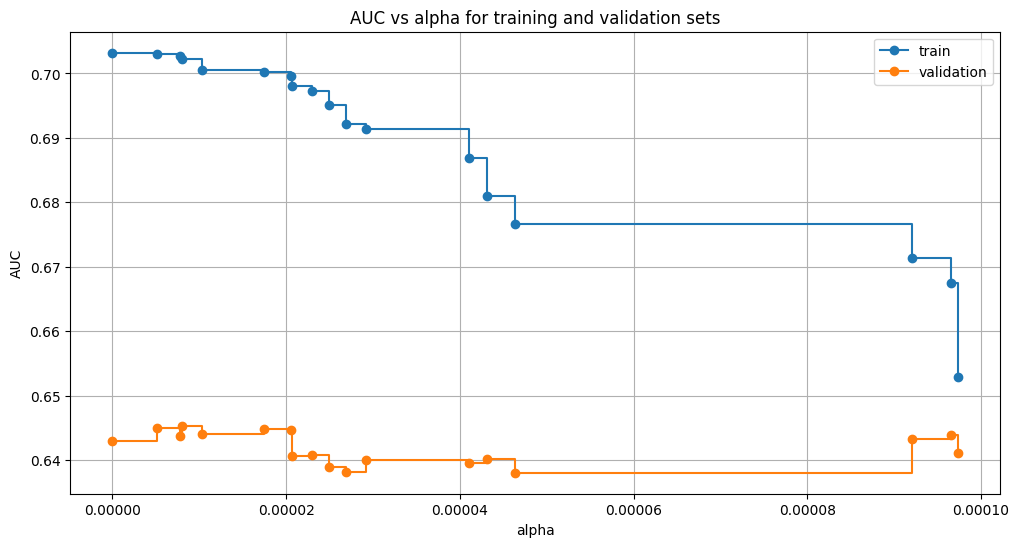

Step 4: Selecting the best model based on validation AUC...

Best ccp_alpha: 0.000008
Corresponding validation AUC: 0.6454
Pruned tree depth: 10
Pruned tree number of leaves: 21


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score # 确保 roc_auc_score 已导入

# --- 假设您的数据已准备好 ---
# X_train, y_train, X_val, y_val
X_train = X_train
y_train = y_train
X_val = X_test
y_val = y_test

# --- 步骤 1: 获取剪枝路径 ---
print("Step 1: Building base tree and finding pruning path...")
clf_base = DecisionTreeClassifier(random_state=42, min_samples_leaf=100)
path = clf_base.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas = path.ccp_alphas


# 移除最后一个最大的alpha，因为它会剪掉所有节点，没有意义
ccp_alphas = ccp_alphas[:-1]

print(f"Found {len(ccp_alphas)} pruning points (alphas).")

# --- 步骤 2: 在验证集上评估不同剪枝程度的树 ---
print("Step 2: Evaluating trees with different alphas on the validation set...")
clfs = []
train_aucs = []
val_aucs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=100, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)

    train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
    val_auc = roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

    train_aucs.append(train_auc)
    val_aucs.append(val_auc)
    clfs.append(clf)

print("Evaluation complete.")

# --- 步骤 3: 可视化结果，找到最佳剪枝点 ---
print("Step 3: Plotting AUC vs alpha...")
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel("alpha")
ax.set_ylabel("AUC")
ax.set_title("AUC vs alpha for training and validation sets")
ax.plot(ccp_alphas, train_aucs, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_aucs, marker='o', label="validation", drawstyle="steps-post")
ax.legend()
plt.grid(True)
plt.show()

# --- 步骤 4: 选出最佳模型 ---
print("Step 4: Selecting the best model based on validation AUC...")
best_alpha_index = np.argmax(val_aucs)
best_ccp_alpha = ccp_alphas[best_alpha_index]
best_tree_pruned = clfs[best_alpha_index]

print(f"\nBest ccp_alpha: {best_ccp_alpha:.6f}")
print(f"Corresponding validation AUC: {val_aucs[best_alpha_index]:.4f}")
print(f"Pruned tree depth: {best_tree_pruned.get_depth()}")
print(f"Pruned tree number of leaves: {best_tree_pruned.get_n_leaves()}")